In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('food_items_binary.csv')

In [3]:
print(data.head())
print(data.columns)

   Calories  Total Fat  Saturated Fat  Monounsaturated Fat  \
0     149.0          0            0.0                  0.0   
1     123.0          0            0.0                  0.0   
2     150.0          0            0.0                  0.0   
3     110.0          0            0.0                  0.0   
4     143.0          0            0.0                  0.0   

   Polyunsaturated Fat  Trans Fat  Cholesterol  Sodium  Total Carbohydrate  \
0                  0.0        0.0            0     9.0                 9.8   
1                  0.0        0.0            0     5.0                 6.6   
2                  0.0        0.0            0     4.0                11.4   
3                  0.0        0.0            0     6.0                 7.0   
4                  0.0        0.0            0     7.0                13.1   

   Dietary Fiber  Sugars  Sugar Alcohol  Protein  Vitamin A  Vitamin C  \
0            0.0     0.0              0      1.3          0          0   
1         

In [4]:
features = ['Calories','Total Fat','Saturated Fat','Sugars','Dietary Fiber','Protein']
target = 'class'

In [5]:
X=data[features]
y=data[target]

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [8]:
svm=SVC()

In [9]:
param_grid={
    'C':[0.1,1,100],
    'kernel':['linear','rbf'],
    'gamma':['scale','auto']
}

In [10]:
grid_search=GridSearchCV(svm,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [11]:
best_model = grid_search.best_estimator_
print("Name:Rosetta Jenifer.C")
print("Register Number:212225230230")
print("Best Parameters:",grid_search.best_params_)

Name:Rosetta Jenifer.C
Register Number:212225230230
Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [15]:
y_pred=best_model.predict(X_test)

In [16]:
accuracy=accuracy_score(y_test,y_pred)
print("Name:Rosetta Jenifer.C")
print("Register Number:212225230230")
print("Accuracy:",accuracy)
print("Classification Report:\n",classification_report(y_test,y_pred))

Name:Rosetta Jenifer.C
Register Number:212225230230
Accuracy: 0.9757853403141361
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1337
           1       0.86      0.96      0.91       191

    accuracy                           0.98      1528
   macro avg       0.93      0.97      0.95      1528
weighted avg       0.98      0.98      0.98      1528



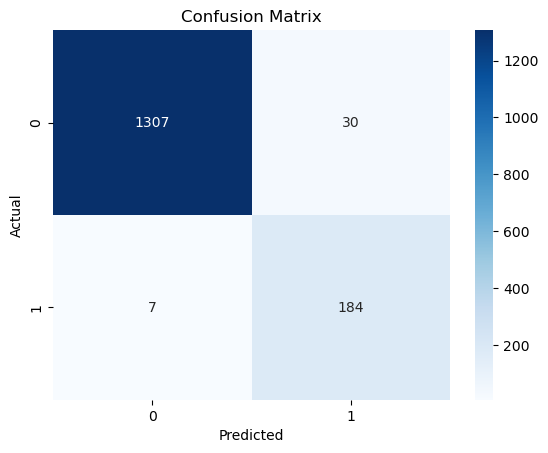

In [14]:
conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()